In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)

In [2]:
# Load the data from the CSV file
data = pd.read_csv('C:/Users/Admin/Desktop/Bykea/bq-results-20220118-174703-12xxzixt2fde.csv')

In [3]:
# To check the rows and columns of data
data.shape

(1734054, 8)

In [4]:
# To Check datatypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734054 entries, 0 to 1734053
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   customer_id       object
 1   acquired_by       object
 2   acquired_date     object
 3   transaction_time  object
 4   product_code      int64 
 5   parent_region_id  object
 6   value             int64 
 7   child_region_id   object
dtypes: int64(2), object(6)
memory usage: 105.8+ MB


In [5]:
# Convert 'acquired_date' and 'transaction_time' column to pandas datetime type
data['acquired_date'] = pd.to_datetime(data['acquired_date'])
data['transaction_time'] = pd.to_datetime(data['transaction_time'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734054 entries, 0 to 1734053
Data columns (total 8 columns):
 #   Column            Dtype              
---  ------            -----              
 0   customer_id       object             
 1   acquired_by       object             
 2   acquired_date     datetime64[ns, UTC]
 3   transaction_time  datetime64[ns]     
 4   product_code      int64              
 5   parent_region_id  object             
 6   value             int64              
 7   child_region_id   object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(2), object(4)
memory usage: 105.8+ MB


In [6]:
# To have a glimpse of our dataset
data.head()

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687000+00:00,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203000+00:00,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209000+00:00,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127000+00:00,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613000+00:00,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4


In [7]:
# Check for duplicates in the entire DataFrame
duplicates = data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicates
print("Number of duplicates:", num_duplicates)

# Display the duplicate rows
duplicate_rows = data[duplicates]
print("Duplicate rows:")
print(duplicate_rows)


Number of duplicates: 0
Duplicate rows:
Empty DataFrame
Columns: [customer_id, acquired_by, acquired_date, transaction_time, product_code, parent_region_id, value, child_region_id]
Index: []


In [8]:
# Check the number of missing values in each column
missing_values_count = data.isnull().sum()
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
customer_id          0
acquired_by          0
acquired_date       70
transaction_time     0
product_code         0
parent_region_id     0
value                0
child_region_id      0
dtype: int64


In [9]:
# Filter the DataFrame to show rows with missing 'acquired_date'
rows_with_missing_date = data[data['acquired_date'].isnull()]
rows_with_missing_date

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id
1935,7f232b48006b462b7c1ee0c096da2976,OFFLINE,NaT,2021-10-28 17:28:39.248,78,07B,60,BEB712D51701D0787EC236821442EA5C
90824,a373dfaa1fb727773e7e1aa09bbde719,ONLINE,NaT,2021-10-28 09:45:34.477,78,07B,167,BEB712D51701D0787EC236821442EA5C
92759,29bdcff0ba4cb2393bf8fb7ff1d6a6f5,OFFLINE,NaT,2021-10-12 14:33:09.494,78,07B,215,D03E45AE45CAFB97B315F3E4A7C2D615
114994,a373dfaa1fb727773e7e1aa09bbde719,ONLINE,NaT,2021-10-20 19:29:34.397,78,07B,132,BEB712D51701D0787EC236821442EA5C
131827,a373dfaa1fb727773e7e1aa09bbde719,ONLINE,NaT,2021-10-25 18:05:47.503,78,07B,135,BEB712D51701D0787EC236821442EA5C
...,...,...,...,...,...,...,...,...
1383941,7f232b48006b462b7c1ee0c096da2976,OFFLINE,NaT,2021-10-21 15:34:44.894,78,07B,215,C142F51706DA139EC3DCAA250682C61A
1621334,a9adb2768ff35e97e24387352a705bf6,OFFLINE,NaT,2021-10-26 13:52:48.753,78,07B,108,EEDD0125ADF9CD4325E56C39462533F5
1634392,a373dfaa1fb727773e7e1aa09bbde719,ONLINE,NaT,2021-10-28 10:33:55.191,78,07B,166,EEDD0125ADF9CD4325E56C39462533F5
1643242,d5bcab31ba17a99f9923f9af6a43aa17,OFFLINE,NaT,2021-10-04 13:57:24.949,78,07B,111,EEDD0125ADF9CD4325E56C39462533F5


In [10]:
# Count the number of unique customers with missing 'acquired_date'
unique_customers_missing_date = rows_with_missing_date['customer_id'].nunique()

# Display the result
print("Number of unique customers with missing 'acquired_date':", unique_customers_missing_date)


Number of unique customers with missing 'acquired_date': 8


In [11]:
# Group the "missing row data df" by 'customer_id' and count the number of missing rows for each customer
missing_rows_count_per_customer = rows_with_missing_date.groupby('customer_id').size()

# Display the result
print("Number of missing rows customer: ", rows_with_missing_date['customer_id'].nunique())
print("Transaction counts per customer (with missing acquired date):")
print(missing_rows_count_per_customer)


Number of missing rows per customer:  8
Transaction counts per customer (with missing acquired date):
customer_id
29bdcff0ba4cb2393bf8fb7ff1d6a6f5     2
5195410e700eb71f79789c0795379e29     1
7f232b48006b462b7c1ee0c096da2976    13
9df8d4ef73c3bbfe714bbebfbc579ecc     2
a373dfaa1fb727773e7e1aa09bbde719     9
a9adb2768ff35e97e24387352a705bf6     1
abbdacd7b84297fd5f94a8c0f64dc6d4    33
d5bcab31ba17a99f9923f9af6a43aa17     9
dtype: int64


In [12]:
# Group the data by 'customer_id' and count the number of transactions for each customer
customer_transaction_counts = data.groupby('customer_id')['transaction_time'].count()

# Display the number of unique customers and their transaction counts
print("Number of unique customers:", customer_transaction_counts.shape[0])
print("Transaction counts per customer:")
print(customer_transaction_counts)


Number of unique customers: 166764
Transaction counts per customer:
customer_id
00000219bc8b6c52e2590455d6dbacab     1
000008bd7350859ef3487c5a3b8f53d7     9
0000944d35ce0a9c9ee3b93e4e387762    45
0001a919b0be58725b24354a75ca25dc    18
0001d445db6f9278bfead370e3d50cd8    21
                                    ..
ffff42081c2066182da9e8325bbe4d07     3
ffff6e9801c1160a3753d668ccbe4d8d    23
ffff73ccb2c62d87cbbcc9c2700bc903     2
ffffc6ddf38234e9e44ff848d9a4ae3f     1
ffffc7d11db85508002ad32119dc9563     3
Name: transaction_time, Length: 166764, dtype: int64


In [13]:
# # Sort the data based on 'transaction_time'
# sorted_data = data.sort_values(by='transaction_time')

# # Use forward fill to impute missing datetime values in 'acquired_date'
# sorted_data['acquired_date'] = sorted_data['acquired_date'].fillna(method='ffill')

# sorted_data

In [14]:
# Removing rows with missing values as the total number of unique customers is greater than the number of customers with missing data.

# Dropping Rows with missing values in Acquired date
data_copy = data.dropna(subset=['acquired_date'])

In [15]:
# Recheck the number of missing values in each column
missing_values_count = data_copy.isnull().sum()
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
customer_id         0
acquired_by         0
acquired_date       0
transaction_time    0
product_code        0
parent_region_id    0
value               0
child_region_id     0
dtype: int64


In [16]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1733984 entries, 0 to 1734053
Data columns (total 8 columns):
 #   Column            Dtype              
---  ------            -----              
 0   customer_id       object             
 1   acquired_by       object             
 2   acquired_date     datetime64[ns, UTC]
 3   transaction_time  datetime64[ns]     
 4   product_code      int64              
 5   parent_region_id  object             
 6   value             int64              
 7   child_region_id   object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(2), object(4)
memory usage: 119.1+ MB


In [17]:
#Feature Engineering

# Extracting day, month, and year features along with day of the week from the 'transaction_time' column and assigning them to new columns in 'data_copy'.
data_copy['transaction_day'] = data_copy['transaction_time'].dt.day
data_copy['transaction_month'] = data_copy['transaction_time'].dt.month
data_copy['transaction_year'] = data_copy['transaction_time'].dt.year
data_copy['transaction_dayofweek'] = data_copy['transaction_time'].dt.dayofweek

# Extracting day, month, and year features along with day of the week from the 'acquired_date' column and assigning them to new columns in 'data_copy'.
data_copy['acquired_day'] = data_copy['acquired_date'].dt.day
data_copy['acquired_month'] = data_copy['acquired_date'].dt.month
data_copy['acquired_year'] = data_copy['acquired_date'].dt.year
data_copy['acquired_dayofweek'] = data_copy['acquired_date'].dt.dayofweek

In [18]:
# Calculating total value spent by each customer
customer_total_value = data_copy.groupby('customer_id')['value'].sum()
data_copy['customer_total_value'] = data_copy['customer_id'].map(customer_total_value)

In [19]:
# Encoding Categorical data
label_encoder = LabelEncoder()
data_copy['acquired_by_encoded'] = label_encoder.fit_transform(data_copy['acquired_by'])
data_copy['product_code_encoded'] = label_encoder.fit_transform(data_copy['product_code'])
data_copy['parent_region_id_encoded'] = label_encoder.fit_transform(data_copy['parent_region_id'])

In [20]:
data_copy.head()

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id,transaction_day,transaction_month,transaction_year,transaction_dayofweek,acquired_day,acquired_month,acquired_year,acquired_dayofweek,customer_total_value,acquired_by_encoded,product_code_encoded,parent_region_id_encoded
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687000+00:00,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8,23,10,2021,5,23,11,2017,3,825,0,4,0
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203000+00:00,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293,23,10,2021,5,19,1,2020,6,3104,0,2,2
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209000+00:00,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293,24,10,2021,6,9,10,2019,2,1109,0,2,2
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127000+00:00,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E,23,10,2021,5,16,9,2018,6,2398,0,2,0
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613000+00:00,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4,23,10,2021,5,7,6,2021,0,969,1,2,0


In [21]:
# Generate Descriptic Statistics of the dataset
data_copy.describe().apply(lambda x: x.apply(lambda y: "{:.1f}".format(y)))

,product_code,value,transaction_day,transaction_month,transaction_year,transaction_dayofweek,acquired_day,acquired_month,acquired_year,acquired_dayofweek,customer_total_value,acquired_by_encoded,product_code_encoded,parent_region_id_encoded
count,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0,1733984.0
mean,78.1,122.9,15.3,10.0,2021.0,2.7,15.5,6.7,2019.2,2.8,2935.1,0.1,2.0,0.4
std,1.5,88.6,8.3,0.0,0.0,1.8,8.7,3.4,1.4,2.0,3145.0,0.3,0.8,0.7
min,76.0,0.0,1.0,10.0,2021.0,0.0,1.0,1.0,2016.0,0.0,0.0,0.0,0.0,0.0
25%,78.0,79.0,8.0,10.0,2021.0,1.0,8.0,4.0,2018.0,1.0,1129.0,0.0,2.0,0.0
50%,78.0,109.0,15.0,10.0,2021.0,3.0,15.0,7.0,2019.0,3.0,2196.0,0.0,2.0,0.0
75%,78.0,148.0,22.0,10.0,2021.0,4.0,23.0,10.0,2020.0,5.0,3812.0,0.0,2.0,1.0
max,98.0,25000.0,30.0,10.0,2021.0,6.0,31.0,12.0,2021.0,6.0,47133.0,1.0,12.0,2.0


In [22]:
# Checking the unique value counts of each column
unique_counts = data_copy.nunique()
unique_counts

customer_id                  166756
acquired_by                       2
acquired_date                166756
transaction_time            1733069
product_code                     13
parent_region_id                  3
value                          1142
child_region_id                 202
transaction_day                  30
transaction_month                 1
transaction_year                  1
transaction_dayofweek             7
acquired_day                     31
acquired_month                   12
acquired_year                     6
acquired_dayofweek                7
customer_total_value           7949
acquired_by_encoded               2
product_code_encoded             13
parent_region_id_encoded          3
dtype: int64

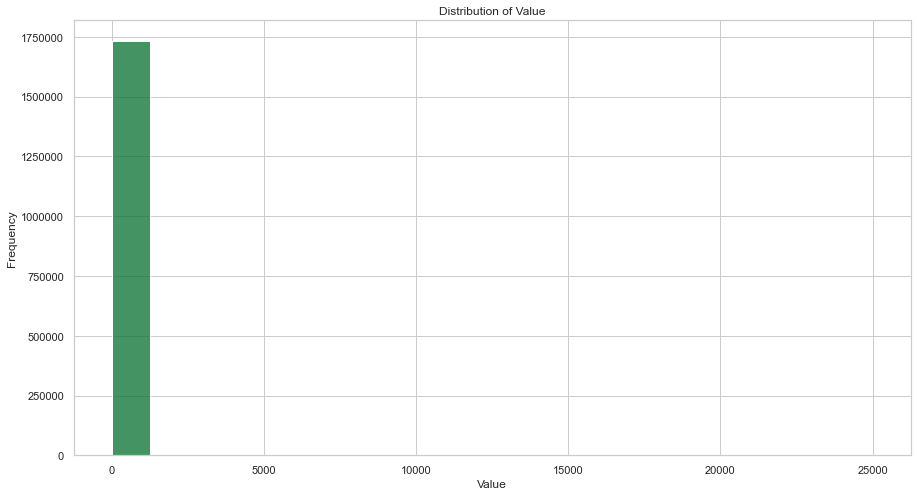

In [23]:
# Plotting the Value Distribution
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', palette='Greens_r')
ax = sns.histplot(data_copy['value'], bins=20)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Value')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

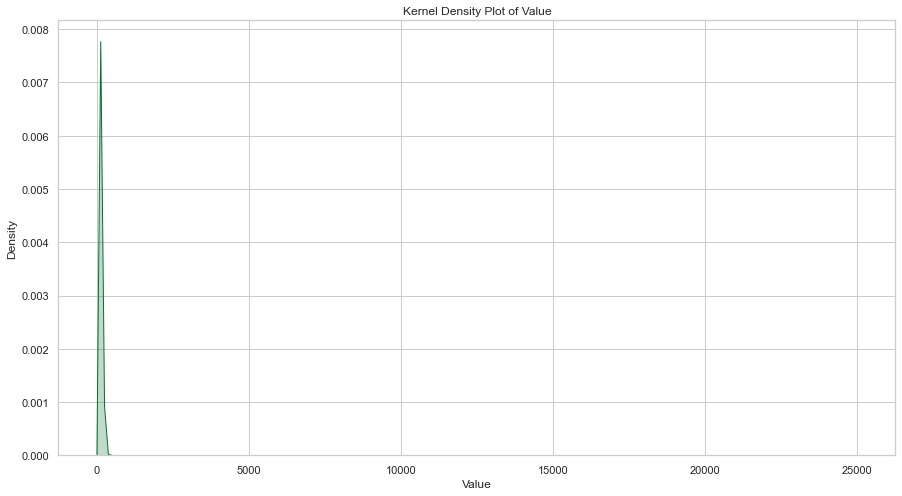

In [24]:
sns.set(style='whitegrid', palette='Greens_r')
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(data_copy['value'], shade=True)
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Kernel Density Plot of Value')
plt.show()

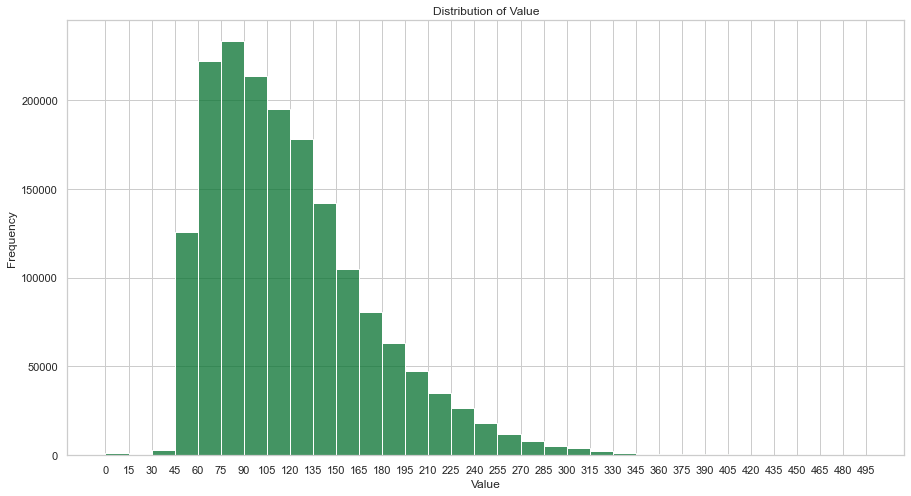

In [25]:
# Plotting Value Distriibution focued on populated region
bin_edges = np.arange(0, 500, 15)
sns.set(style='whitegrid', palette='Greens_r')
plt.figure(figsize=(15, 8))
ax = sns.histplot(data_copy['value'], bins=bin_edges, kde=False)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Value')
ax.set_xticks(bin_edges)
plt.show()

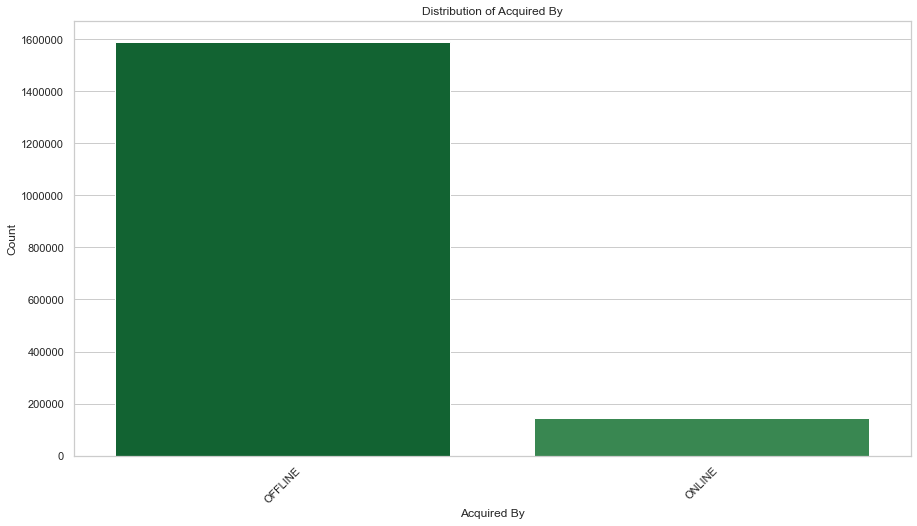

In [26]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', palette='Greens_r')
ax = sns.barplot(x=data_copy['acquired_by'].value_counts().index, y=data_copy['acquired_by'].value_counts())
ax.set_xlabel('Acquired By')
ax.set_ylabel('Count')
ax.set_title('Distribution of Acquired By')
plt.xticks(rotation=45)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

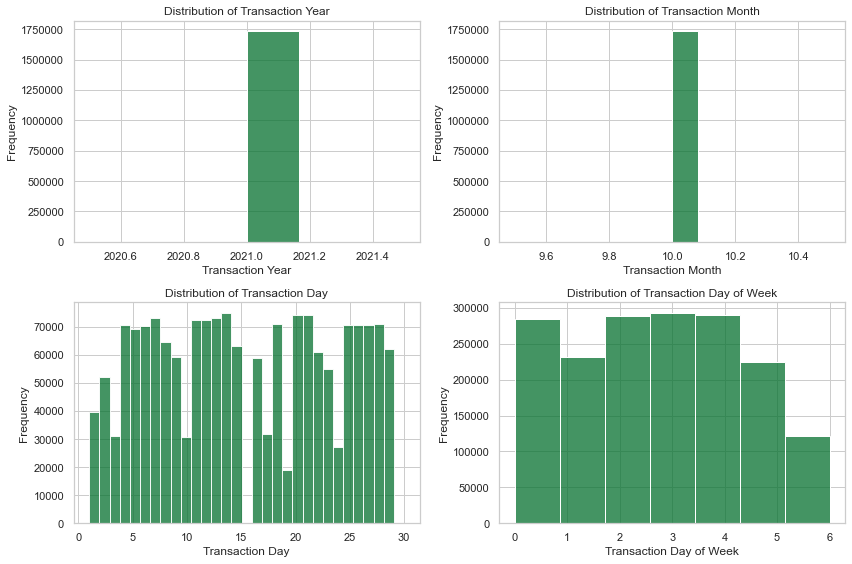

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.set(style='whitegrid', palette='Greens_r')

# Plot the first histogram (transaction year)
sns.histplot(data_copy['transaction_year'], bins=6, ax=axs[0, 0])
axs[0, 0].set_xlabel('Transaction Year')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Transaction Year')
axs[0,0].ticklabel_format(style='plain', axis='y')


# Plot the second histogram (transaction month)
sns.histplot(data_copy['transaction_month'], bins=12, ax=axs[0, 1])
axs[0, 1].set_xlabel('Transaction Month')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Transaction Month')
axs[0,1].ticklabel_format(style='plain', axis='y')


# Plot the third histogram (transaction day)
sns.histplot(data_copy['transaction_day'], bins=31, ax=axs[1, 0])
axs[1, 0].set_xlabel('Transaction Day')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Transaction Day')
axs[1,0].ticklabel_format(style='plain', axis='y')


# Plot the fourth histogram (transaction day of week)
sns.histplot(data_copy['transaction_dayofweek'], bins=7, ax=axs[1, 1])
axs[1, 1].set_xlabel('Transaction Day of Week')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Transaction Day of Week')
axs[1,1].ticklabel_format(style='plain', axis='y')


# Adjust the space between subplots
fig.tight_layout()

# Display the grid of histograms
plt.show()

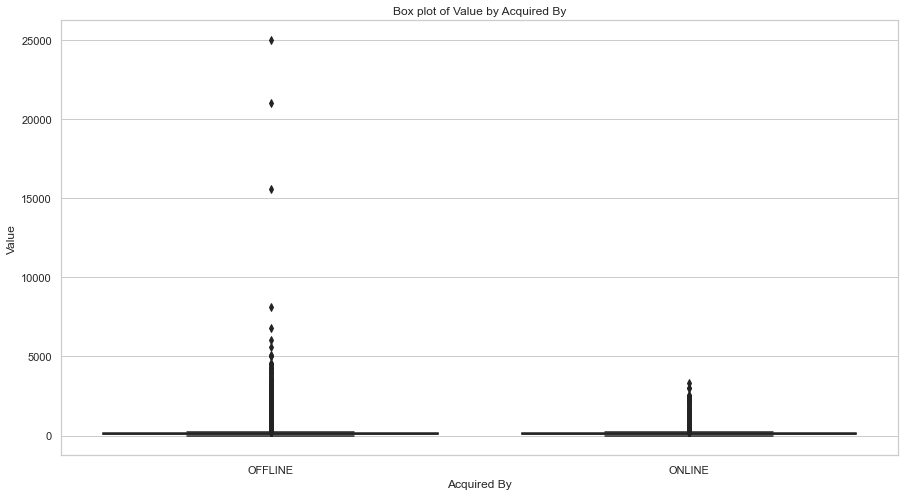

In [28]:
sns.set(style='whitegrid', palette='Greens_r')
# Box plot of 'value' for each 'acquired_by' category
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='acquired_by', y='value', data=data_copy)
ax.set_xlabel('Acquired By')
ax.set_ylabel('Value')
ax.set_title('Box plot of Value by Acquired By')
plt.show()

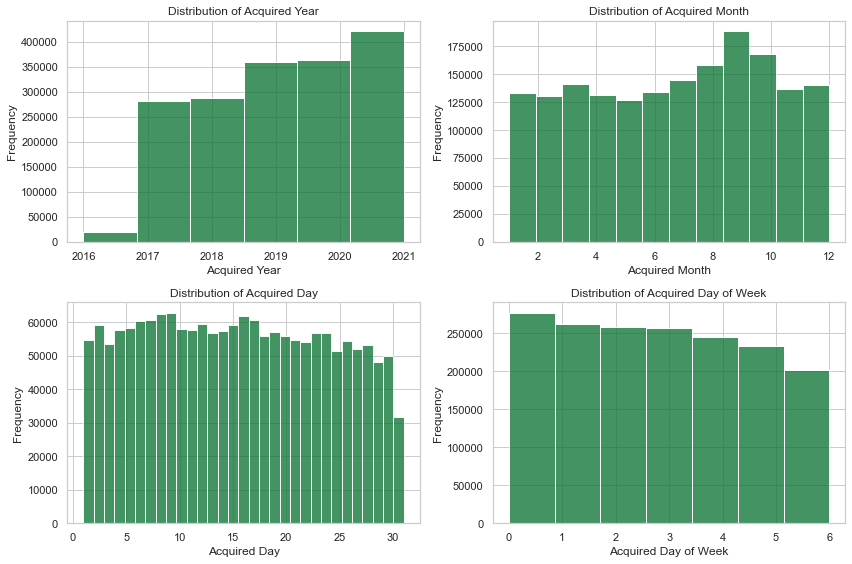

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.set(style='whitegrid', palette='Greens_r')

# Plot the first histogram (acquired year)
sns.histplot(data_copy['acquired_year'], bins=6, ax=axs[0, 0])
axs[0, 0].set_xlabel('Acquired Year')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Acquired Year')
axs[0, 0].ticklabel_format(style='plain', axis='y')


# Plot the second histogram (acquired month)
sns.histplot(data_copy['acquired_month'], bins=12, ax=axs[0, 1])
axs[0, 1].set_xlabel('Acquired Month')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Acquired Month')
axs[0, 1].ticklabel_format(style='plain', axis='y')


# Plot the third histogram (acquired day)
sns.histplot(data_copy['acquired_day'], bins=31, ax=axs[1, 0])
axs[1, 0].set_xlabel('Acquired Day')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Acquired Day')
axs[1, 0].ticklabel_format(style='plain', axis='y')


# Plot the fourth histogram (acquired day of week)
sns.histplot(data_copy['acquired_dayofweek'], bins=7, ax=axs[1, 1])
axs[1, 1].set_xlabel('Acquired Day of Week')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Acquired Day of Week')
axs[1, 1].ticklabel_format(style='plain', axis='y')


# Adjust the space between subplots
fig.tight_layout()

# Display the grid of histograms
plt.show()

In [30]:
data_copy.head()

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id,transaction_day,transaction_month,transaction_year,transaction_dayofweek,acquired_day,acquired_month,acquired_year,acquired_dayofweek,customer_total_value,acquired_by_encoded,product_code_encoded,parent_region_id_encoded
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687000+00:00,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8,23,10,2021,5,23,11,2017,3,825,0,4,0
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203000+00:00,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293,23,10,2021,5,19,1,2020,6,3104,0,2,2
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209000+00:00,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293,24,10,2021,6,9,10,2019,2,1109,0,2,2
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127000+00:00,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E,23,10,2021,5,16,9,2018,6,2398,0,2,0
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613000+00:00,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4,23,10,2021,5,7,6,2021,0,969,1,2,0


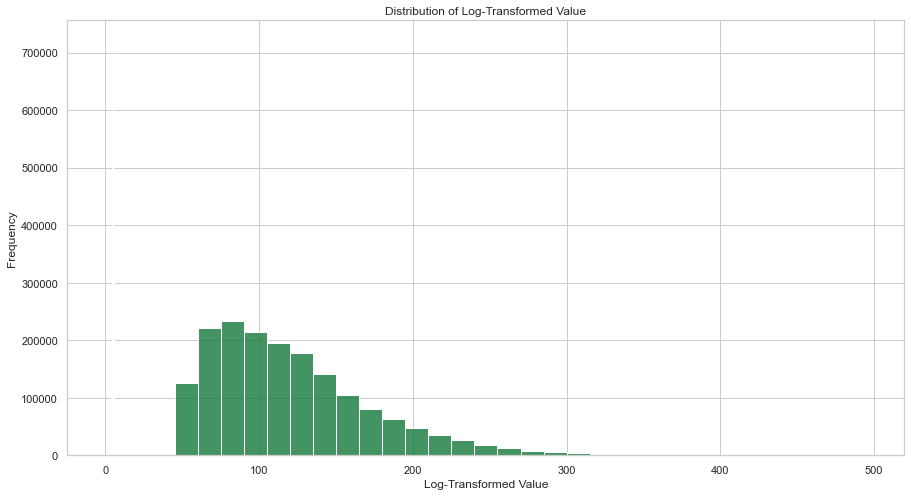

In [31]:
# Log transformation
data_copy['log_value'] = np.log1p(data_copy['value'])

# Visualization of log-transformed 'value'
sns.set(style='whitegrid', palette='Greens_r')
plt.figure(figsize=(15, 8))
ax = sns.histplot(data_copy['log_value'], bins=20)
ax = sns.histplot(data_copy['value'], bins=bin_edges, kde=False)
ax.set_xlabel('Log-Transformed Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Log-Transformed Value')
plt.show()

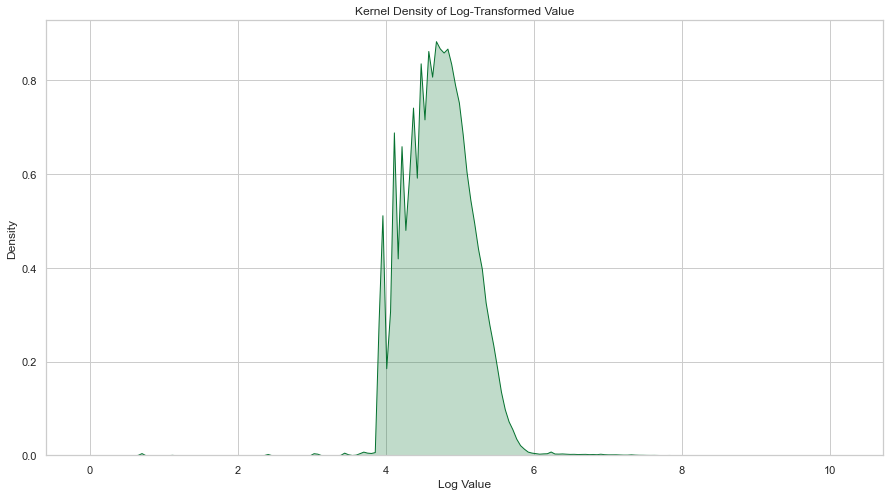

In [32]:
sns.set(style='whitegrid', palette='Greens_r')
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(data_copy['log_value'], shade=True)
ax.set_xlabel('Log Value')
ax.set_ylabel('Density')
ax.set_title('Kernel Density of Log-Transformed Value')
plt.show()

data_copy.drop('log_value', axis=1, inplace=True)

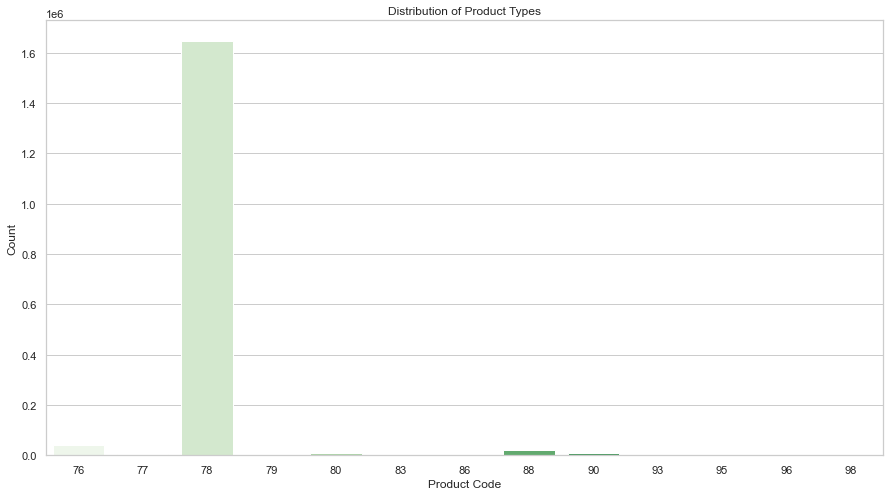

In [33]:
# Group the data by 'product_code' and count the occurrences of each product type
product_counts = data_copy['product_code'].value_counts().reset_index()
product_counts.rename(columns={'index': 'Product Code', 'product_code': 'Count'}, inplace=True)

# Sort the product types by count in descending order
product_counts.sort_values(by='Count', ascending=False, inplace=True)

# Set the color palette
colors = sns.color_palette('Greens', len(product_counts))

# Plot a bar chart to visualize the distribution of product types
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=product_counts['Product Code'], y=product_counts['Count'], palette=colors)
ax.set_xlabel('Product Code')
ax.set_ylabel('Count')
ax.set_title('Distribution of Product Types')
plt.show()

In [34]:
# Question # 01: As a Data Analyst, the company requires a way to,
# 1. Identify User based on Purchase Habits, Spending Ability.

In [35]:
# Determine Transaction Frequency of each customer
transaction_frequency = data_copy.groupby('customer_id')['transaction_time'].count().reset_index()
transaction_frequency.rename(columns={'transaction_time': 'Transaction Frequency'}, inplace=True)
print(transaction_frequency)

                             customer_id  Transaction Frequency
0       00000219bc8b6c52e2590455d6dbacab                      1
1       000008bd7350859ef3487c5a3b8f53d7                      9
2       0000944d35ce0a9c9ee3b93e4e387762                     45
3       0001a919b0be58725b24354a75ca25dc                     18
4       0001d445db6f9278bfead370e3d50cd8                     21
...                                  ...                    ...
166751  ffff42081c2066182da9e8325bbe4d07                      3
166752  ffff6e9801c1160a3753d668ccbe4d8d                     23
166753  ffff73ccb2c62d87cbbcc9c2700bc903                      2
166754  ffffc6ddf38234e9e44ff848d9a4ae3f                      1
166755  ffffc7d11db85508002ad32119dc9563                      3

[166756 rows x 2 columns]


In [36]:
# Determine Monetary Value of each customer
monetary_value = data_copy.groupby('customer_id')['value'].sum().reset_index()
monetary_value.rename(columns={'value': 'Monetary Value'}, inplace=True)
print(monetary_value)

                             customer_id  Monetary Value
0       00000219bc8b6c52e2590455d6dbacab              87
1       000008bd7350859ef3487c5a3b8f53d7             832
2       0000944d35ce0a9c9ee3b93e4e387762            3925
3       0001a919b0be58725b24354a75ca25dc            1435
4       0001d445db6f9278bfead370e3d50cd8            2061
...                                  ...             ...
166751  ffff42081c2066182da9e8325bbe4d07             510
166752  ffff6e9801c1160a3753d668ccbe4d8d            5070
166753  ffff73ccb2c62d87cbbcc9c2700bc903             289
166754  ffffc6ddf38234e9e44ff848d9a4ae3f             128
166755  ffffc7d11db85508002ad32119dc9563             517

[166756 rows x 2 columns]


In [37]:
# Determine Average Purchase Value of each customer
average_purchase_value = data_copy.groupby('customer_id')['value'].mean().reset_index()
average_purchase_value.rename(columns={'value': 'Average Purchase Value'}, inplace=True)
print(average_purchase_value)

                             customer_id  Average Purchase Value
0       00000219bc8b6c52e2590455d6dbacab               87.000000
1       000008bd7350859ef3487c5a3b8f53d7               92.444444
2       0000944d35ce0a9c9ee3b93e4e387762               87.222222
3       0001a919b0be58725b24354a75ca25dc               79.722222
4       0001d445db6f9278bfead370e3d50cd8               98.142857
...                                  ...                     ...
166751  ffff42081c2066182da9e8325bbe4d07              170.000000
166752  ffff6e9801c1160a3753d668ccbe4d8d              220.434783
166753  ffff73ccb2c62d87cbbcc9c2700bc903              144.500000
166754  ffffc6ddf38234e9e44ff848d9a4ae3f              128.000000
166755  ffffc7d11db85508002ad32119dc9563              172.333333

[166756 rows x 2 columns]


In [38]:
# Calculate Frequency: Count the total number of transactions made by the customer
frequency_df = data.groupby('customer_id')['transaction_time'].count().reset_index()
frequency_df.rename(columns={'transaction_time': 'Frequency'}, inplace=True)

# Calculate Monetary Value: Calculate the total monetary value of the customer's transactions
monetary_df = data.groupby('customer_id')['value'].sum().reset_index()
monetary_df.rename(columns={'value': 'Monetary Value'}, inplace=True)

# Calculate Monetary Value: Calculate the total monetary value of the customer's transactions
avg_spending_ability_df = data_copy.groupby('customer_id')['value'].mean().reset_index()
avg_spending_ability_df.rename(columns={'value': 'Average Spending Ability'}, inplace=True)

# Merge the three metrics into a single DataFrame
fms_df = frequency_df.merge(monetary_df, on='customer_id')
fms_df = fms_df.merge(avg_spending_ability_df, on='customer_id')

# Display the resulting DataFrame with the FMS metrics
fms_df.head()

,customer_id,Frequency,Monetary Value,Average Spending Ability
0,00000219bc8b6c52e2590455d6dbacab,1,87,87.000000
1,000008bd7350859ef3487c5a3b8f53d7,9,832,92.444444
2,0000944d35ce0a9c9ee3b93e4e387762,45,3925,87.222222
3,0001a919b0be58725b24354a75ca25dc,18,1435,79.722222
4,0001d445db6f9278bfead370e3d50cd8,21,2061,98.142857


In [39]:
scaler = StandardScaler()
fms_scaled = scaler.fit_transform(fms_df[['Frequency', 'Monetary Value', 'Average Spending Ability']])
fms_scaled

array([[-0.74319631, -0.7668513 , -0.56337745],
       [-0.11057645, -0.28729532, -0.49273217],
       [ 2.73621288,  1.70366662, -0.56049397],
       ...,
       [-0.66411882, -0.63682404,  0.18272329],
       [-0.74319631, -0.74045963, -0.03137518],
       [-0.58504134, -0.4900606 ,  0.5438793 ]])

In [40]:
k = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
fms_df['Cluster'] = kmeans.fit_predict(fms_scaled)

# Analyze the characteristics of each cluster
cluster_characteristics = fms_df.groupby('Cluster').agg({
    'Frequency': 'mean',
    'Monetary Value': 'mean',
    'Average Spending Ability':'mean',
    'customer_id': 'count'
})
cluster_characteristics.rename(columns={'customer_id': 'Number of Customers'}, inplace=True)

# Display the characteristics of each cluster
cluster_characteristics

,Frequency,Monetary Value,Average Spending Ability,Number of Customers
Cluster,,,,
0,6.239624,742.510974,128.493985,138788
1,31.035433,3937.205878,139.965718,27968


In [41]:
# Data for each cluster
spending_ability = cluster_characteristics['Average Spending Ability']
frequency = cluster_characteristics['Frequency']
monetary_value = cluster_characteristics['Monetary Value']
number_of_customers = cluster_characteristics['Number of Customers']
clusters = cluster_characteristics.index

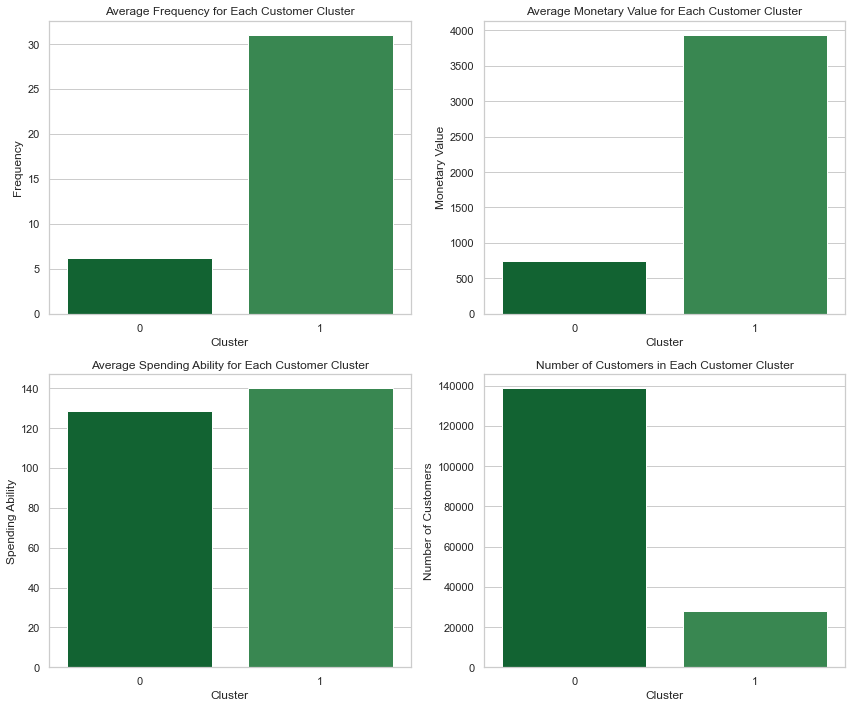

In [42]:
sns.set(style='whitegrid', palette='Greens_r')

# Create a grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bar plot for Frequency
sns.barplot(x=clusters, y=frequency, ax=axes[0, 0])
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Average Frequency for Each Customer Cluster')

# Bar plot for Monetary Value
sns.barplot(x=clusters, y=monetary_value, ax=axes[0, 1])
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Monetary Value')
axes[0, 1].set_title('Average Monetary Value for Each Customer Cluster')

# Bar plot for Spending Ability
sns.barplot(x=clusters, y=spending_ability, ax=axes[1, 0])
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Spending Ability')
axes[1, 0].set_title('Average Spending Ability for Each Customer Cluster')

# Bar plot for Number of Customers
sns.barplot(x=clusters, y=number_of_customers, ax=axes[1, 1])
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_title('Number of Customers in Each Customer Cluster')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the grid of bar plots
plt.show()

In [43]:
data_copy.head()

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id,transaction_day,transaction_month,transaction_year,transaction_dayofweek,acquired_day,acquired_month,acquired_year,acquired_dayofweek,customer_total_value,acquired_by_encoded,product_code_encoded,parent_region_id_encoded
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687000+00:00,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8,23,10,2021,5,23,11,2017,3,825,0,4,0
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203000+00:00,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293,23,10,2021,5,19,1,2020,6,3104,0,2,2
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209000+00:00,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293,24,10,2021,6,9,10,2019,2,1109,0,2,2
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127000+00:00,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E,23,10,2021,5,16,9,2018,6,2398,0,2,0
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613000+00:00,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4,23,10,2021,5,7,6,2021,0,969,1,2,0


In [44]:
fms_df[['customer_id','Cluster']]

,customer_id,Cluster
0,00000219bc8b6c52e2590455d6dbacab,0
1,000008bd7350859ef3487c5a3b8f53d7,0
2,0000944d35ce0a9c9ee3b93e4e387762,1
3,0001a919b0be58725b24354a75ca25dc,0
4,0001d445db6f9278bfead370e3d50cd8,0
...,...,...
166751,ffff42081c2066182da9e8325bbe4d07,0
166752,ffff6e9801c1160a3753d668ccbe4d8d,1
166753,ffff73ccb2c62d87cbbcc9c2700bc903,0
166754,ffffc6ddf38234e9e44ff848d9a4ae3f,0


In [45]:
# Save the DataFrame as a CSV file
data_copy.to_csv('data_copy.csv', index=False)

In [47]:
clustered_df = data_copy.copy()

# Create a dictionary to map customer IDs to their respective clusters
customer_cluster_map = fms_df.set_index('customer_id')['Cluster'].to_dict()
# Create a new column 'Cluster' in 'data_copy' using the mapping
clustered_df['Cluster'] = clustered_df['customer_id'].map(customer_cluster_map)

# Display the first few rows of the updated dataframe with cluster labels
clustered_df.head()


,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id,transaction_day,transaction_month,...,transaction_dayofweek,acquired_day,acquired_month,acquired_year,acquired_dayofweek,customer_total_value,acquired_by_encoded,product_code_encoded,parent_region_id_encoded,Cluster
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687000+00:00,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8,23,10,...,5,23,11,2017,3,825,0,4,0,0
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203000+00:00,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293,23,10,...,5,19,1,2020,6,3104,0,2,2,1
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209000+00:00,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293,24,10,...,6,9,10,2019,2,1109,0,2,2,0
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127000+00:00,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E,23,10,...,5,16,9,2018,6,2398,0,2,0,0
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613000+00:00,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4,23,10,...,5,7,6,2021,0,969,1,2,0,0


In [48]:
data_copy.shape

(1733984, 20)

In [50]:
clustered_df.shape

(1733984, 21)

In [52]:
clustered_df.to_csv('clustered_data.csv', index=False)

In [53]:
# As a Data Analyst, to address the company's needs, we have devised a clustering approach that categorizes customers based 
# on their purchase habits and spending ability.

# Cluster 0 comprises customers who have made relatively recent but infrequent purchases with low values. These individuals 
# may require targeted marketing strategies to increase their engagement.

# Cluster 1 encompasses customers who have made very recent, frequent, and high-value purchases. These individuals are likely 
# the company's top-tier customers and should be given special attention to maintain their loyalty and increase their 
# satisfaction.



In [54]:
# 2. Region Based analysis of Transactions and Users.

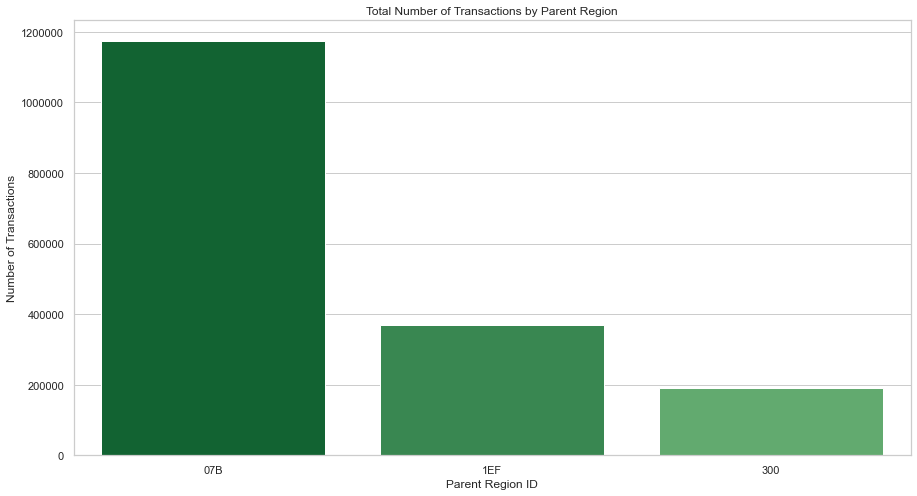

In [55]:
# Analyze the total number of transactions in each parent region
transactions_by_parent_region = data_copy.groupby('parent_region_id')['transaction_time'].count()

# Sort the parent regions based on the total number of transactions in descending order
transactions_by_parent_region = transactions_by_parent_region.sort_values(ascending=False)

# Plot the total number of transactions in each parent region
sns.set(style='whitegrid', palette='Greens_r')
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=transactions_by_parent_region.index, y=transactions_by_parent_region.values)
ax.set_xlabel('Parent Region ID')
ax.set_ylabel('Number of Transactions')
ax.set_title('Total Number of Transactions by Parent Region')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

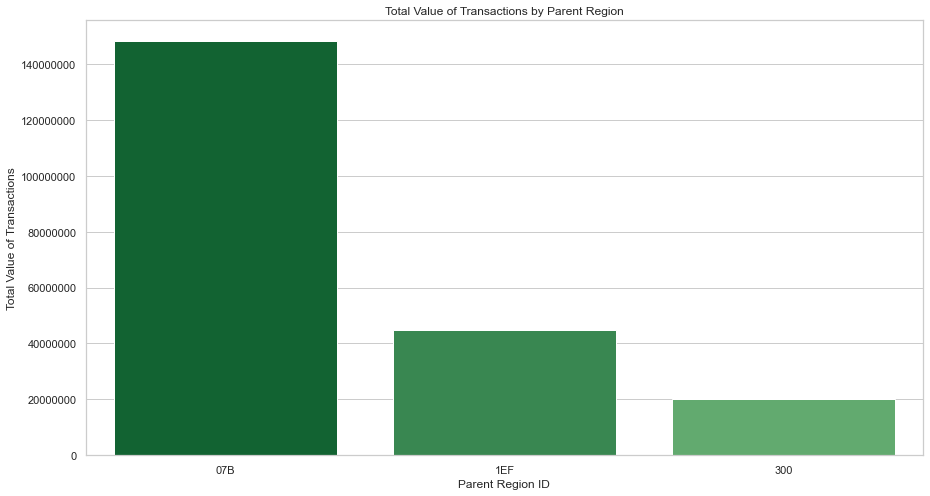

In [56]:
# Analyze the total value of transactions in each parent region
total_value_by_parent_region = data_copy.groupby('parent_region_id')['value'].sum()

# Sort the parent regions based on the total value of transactions in descending order
total_value_by_parent_region = total_value_by_parent_region.sort_values(ascending=False)

# Plot the total value of transactions in each parent region
sns.set(style='whitegrid', palette='Greens_r')
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=total_value_by_parent_region.index, y=total_value_by_parent_region.values)
ax.set_xlabel('Parent Region ID')
ax.set_ylabel('Total Value of Transactions')
ax.set_title('Total Value of Transactions by Parent Region')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [57]:
# Group the data by 'parent_region_id' and count the number of unique 'child_region_id'
unique_child_regions_per_parent = data_copy.groupby('parent_region_id')['child_region_id'].nunique()
unique_child_regions_per_parent

parent_region_id
07B    60
1EF    70
300    72
Name: child_region_id, dtype: int64

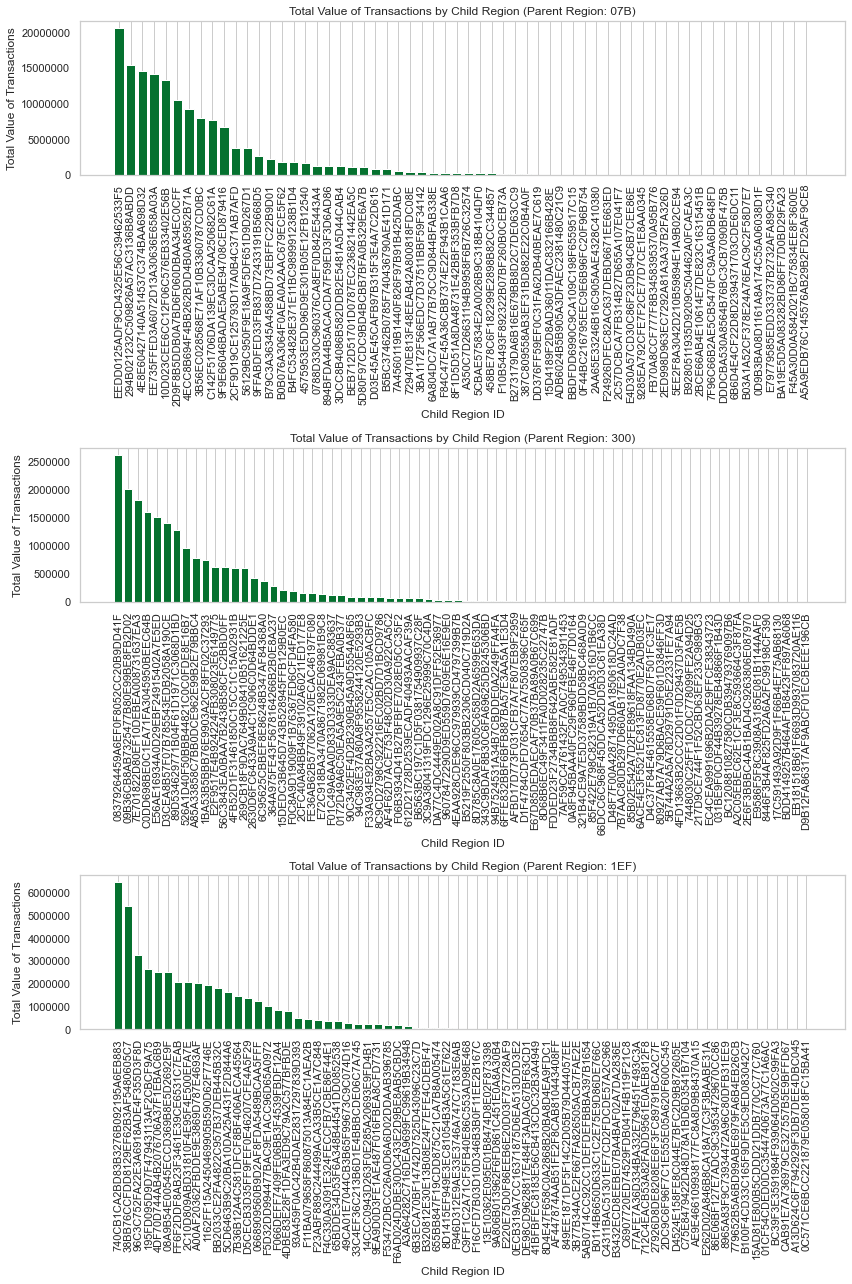

In [58]:
# Define a function to plot total value of transactions by child region
def plot_value_by_child_region(data, region_column, value_column):
    regions = data[region_column].unique()
    num_plots = len(regions)
    
    # Create subplots with adjusted size and spacing
    fig, axs = plt.subplots(num_plots, 1, figsize=(12, 6*num_plots))
    
    for i, region in enumerate(regions):
        # Filter data for the current region
        region_data = data[data[region_column] == region]
        
        # Analyze the total value of transactions in each child region of the current parent region
        total_value_by_child_region = region_data.groupby('child_region_id')[value_column].sum()

        # Sort the child regions based on the total value of transactions in descending order
        total_value_by_child_region = total_value_by_child_region.sort_values(ascending=False)

        # Plot the total value of transactions in each child region using vertical bar chart
        sns.set(style='whitegrid', palette='Greens_r')
        axs[i].bar(total_value_by_child_region.index, total_value_by_child_region.values)
        axs[i].set_xlabel('Child Region ID')
        axs[i].set_ylabel('Total Value of Transactions')
        axs[i].set_title(f'Total Value of Transactions by Child Region (Parent Region: {region})')
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].ticklabel_format(style='plain', axis='y')
        axs[i].grid(axis='y')

    plt.tight_layout()
    plt.show()

# Call the function to plot total value of transactions by child region for each parent region
plot_value_by_child_region(data_copy, 'parent_region_id', 'value')


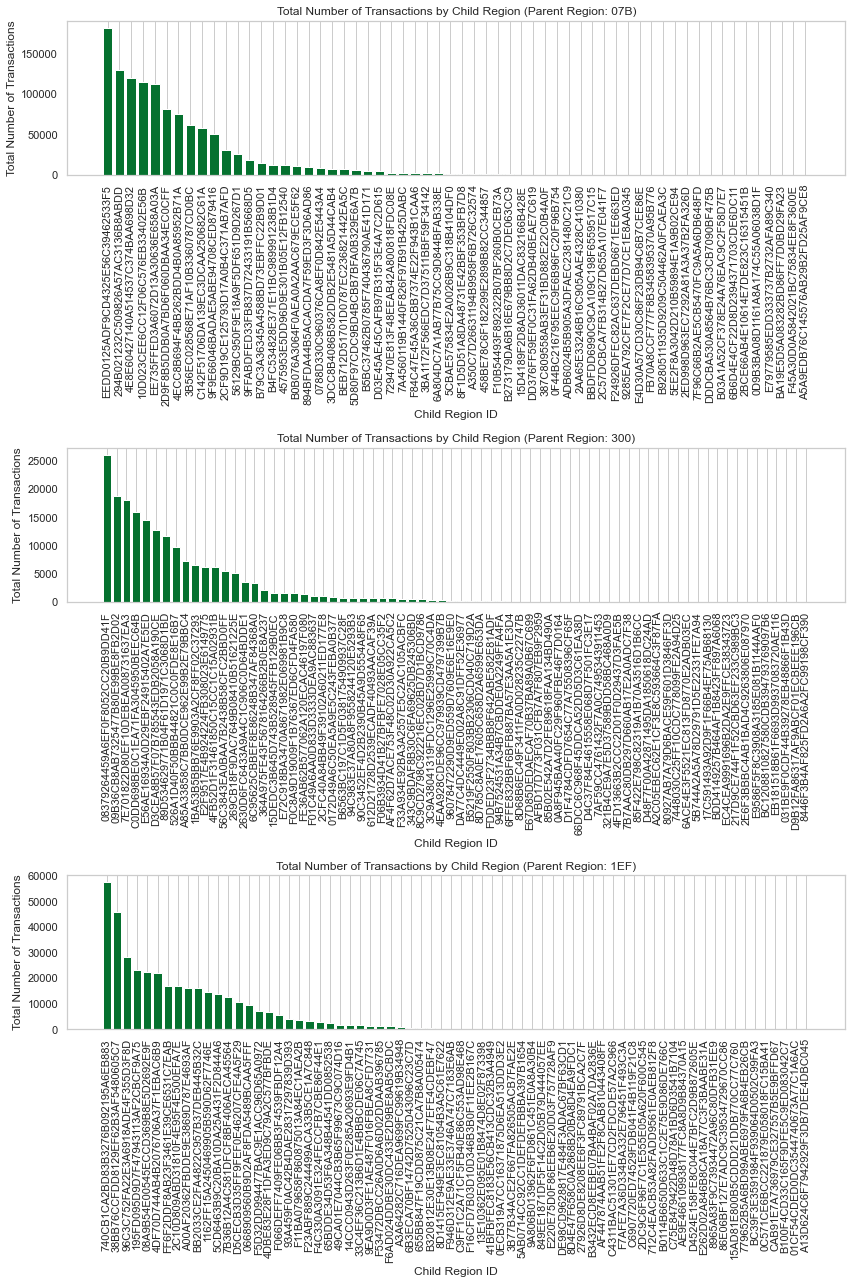

In [59]:
# Define a function to plot total number of transactions by child region
def plot_transactions_by_child_region(data, region_column):
    regions = data[region_column].unique()
    num_plots = len(regions)
    
    # Create subplots with adjusted size and spacing
    fig, axs = plt.subplots(num_plots, 1, figsize=(12, 6*num_plots))
    
    for i, region in enumerate(regions):
        # Filter data for the current region
        region_data = data[data[region_column] == region]
        
        # Count the total number of transactions in each child region of the current parent region
        total_transactions_by_child_region = region_data['child_region_id'].value_counts()

        # Sort the child regions based on the total number of transactions in descending order
        total_transactions_by_child_region = total_transactions_by_child_region.sort_values(ascending=False)

        # Plot the total number of transactions in each child region using vertical bar chart
        sns.set(style='whitegrid', palette='Greens_r')
        axs[i].bar(total_transactions_by_child_region.index, total_transactions_by_child_region.values)
        axs[i].set_xlabel('Child Region ID')
        axs[i].set_ylabel('Total Number of Transactions')
        axs[i].set_title(f'Total Number of Transactions by Child Region (Parent Region: {region})')
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].ticklabel_format(style='plain', axis='y')
        axs[i].grid(axis='y')

    plt.tight_layout()
    plt.show()

# Call the function to plot total number of transactions by child region for each parent region
plot_transactions_by_child_region(data_copy, 'parent_region_id')


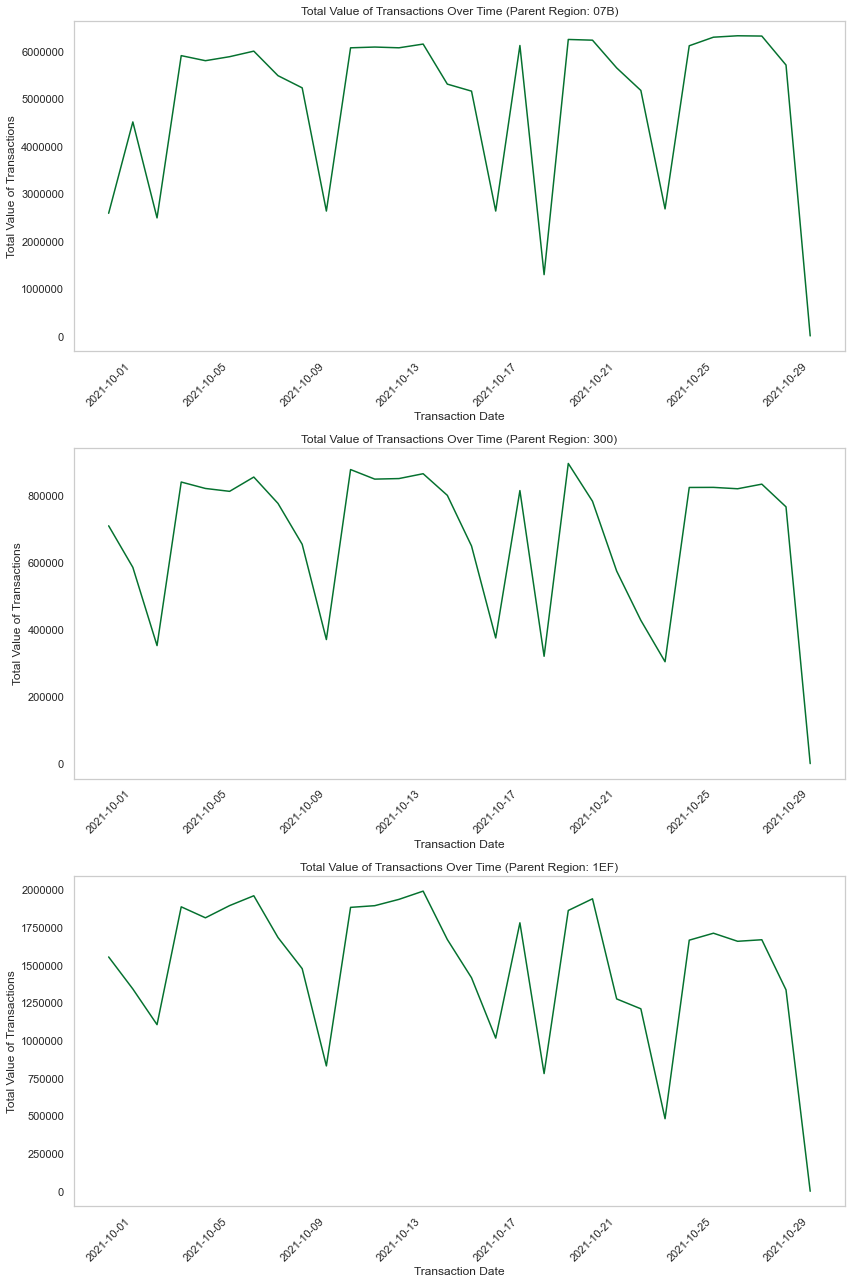

In [60]:
# Define a function to plot the total value of transactions over time for each parent region
def plot_value_over_time(data, region_column, date_column, value_column, time_interval='M'):
    regions = data[region_column].unique()
    num_plots = len(regions)
    
    # Create subplots with adjusted size and spacing
    fig, axs = plt.subplots(num_plots, 1, figsize=(12, 6*num_plots))
    
    for i, region in enumerate(regions):
        # Filter data for the current region
        region_data = data[data[region_column] == region]
        
        # Group the data by transaction date and sum the total value of transactions for each date
        data_aggregated = region_data.groupby(pd.Grouper(key=date_column, freq=time_interval))[value_column].sum()

        # Plot the total value of transactions over time using a line plot
        sns.set(style='whitegrid', palette='Greens_r')
        axs[i].plot(data_aggregated.index, data_aggregated.values)
        axs[i].set_xlabel('Transaction Date')
        axs[i].set_ylabel('Total Value of Transactions')
        axs[i].set_title(f'Total Value of Transactions Over Time (Parent Region: {region})')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].ticklabel_format(style='plain', axis='y')
        axs[i].grid()



    plt.tight_layout()
    plt.show()

# Call the function to plot the total value of transactions over time for each parent region
plot_value_over_time(data_copy, 'parent_region_id', 'transaction_time', 'value', time_interval='D')


In [61]:
# Group customers by their parent regions and count the number of unique customers in each region
unique_customers_by_parent_region = data_copy.groupby('parent_region_id')['customer_id'].nunique()

# Convert the grouped data into a DataFrame for better visualization
unique_customers_by_parent_region_df = unique_customers_by_parent_region.reset_index()
unique_customers_by_parent_region_df.rename(columns={'customer_id': 'Number of Unique Customers'}, inplace=True)

# Sort the DataFrame by the number of unique customers in descending order
unique_customers_by_parent_region_df_sorted = unique_customers_by_parent_region_df.sort_values(by='Number of Unique Customers', ascending=False)

# Print the DataFrame showing the number of unique customers in each parent region
unique_customers_by_parent_region_df_sorted

,parent_region_id,Number of Unique Customers
0,07B,107128
1,1EF,43381
2,300,18655


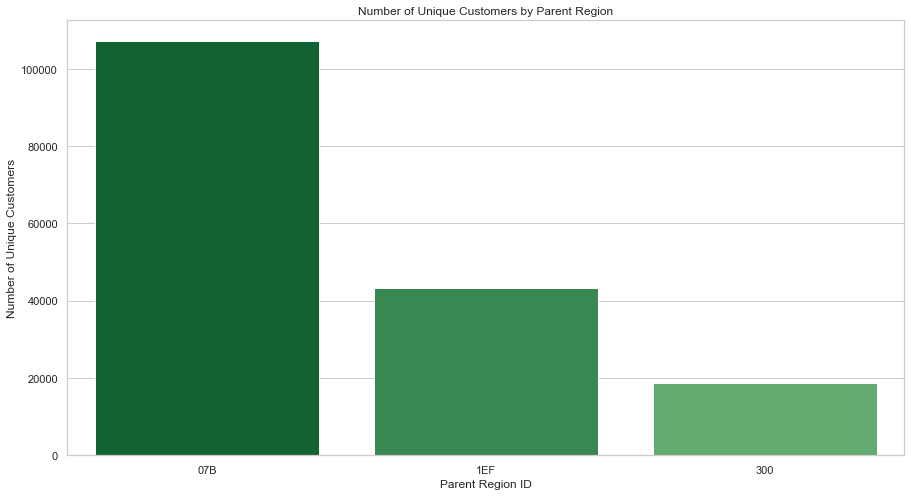

In [62]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=unique_customers_by_parent_region_df_sorted['parent_region_id'], y=unique_customers_by_parent_region_df_sorted['Number of Unique Customers'])
ax.set_xlabel('Parent Region ID')
ax.set_ylabel('Number of Unique Customers')
ax.set_title('Number of Unique Customers by Parent Region')
plt.show()

In [63]:
# Calculate the total number of unique customers
total_unique_customers = data_copy['customer_id'].nunique()

# Print the total number of unique customers
print("Total Number of Unique Customers:", total_unique_customers)


Total Number of Unique Customers: 166756


In [64]:
# Group the data by 'customer_id' and count the unique occurrences of 'parent_region_id' for each customer
customer_parent_region_count = data_copy.groupby('customer_id')['parent_region_id'].nunique()

# Find the customer IDs with more than one unique parent region ID
customers_with_multiple_parent_regions1 = customer_parent_region_count[customer_parent_region_count ==1]
customers_with_multiple_parent_regions2 = customer_parent_region_count[customer_parent_region_count ==2]
customers_with_multiple_parent_regions3 = customer_parent_region_count[customer_parent_region_count ==3]
print("Customers with Transactions from One Parrent Region: ",len(customers_with_multiple_parent_regions1.index.to_list()))
print("Customers with Transactions from Two Parrent Region:   ",len(customers_with_multiple_parent_regions2.index.to_list()))
print("Customers with Transactions from Three Parrent Region:   ",len(customers_with_multiple_parent_regions3.index.to_list()))


Customers with Transactions from One Parrent Region:  164409
Customers with Transactions from Two Parrent Region:    2286
Customers with Transactions from Three Parrent Region:    61


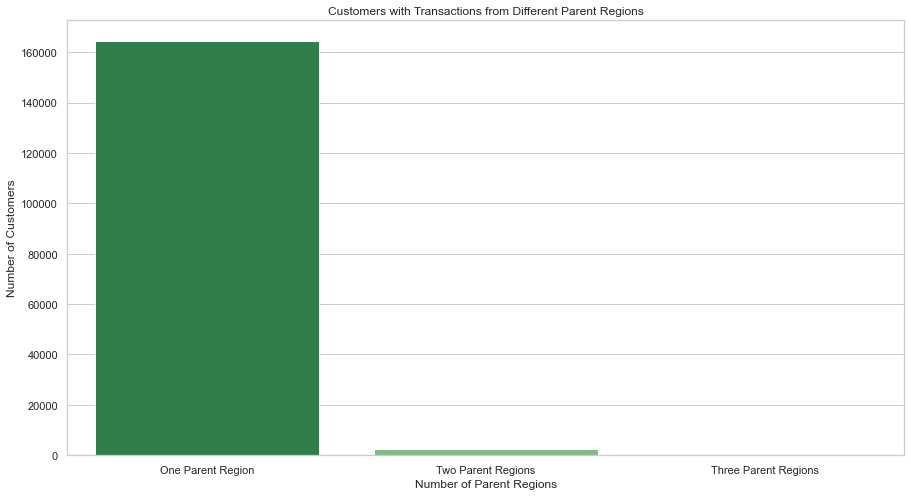

In [65]:
# Get the counts of customers for each category
counts = [len(customers_with_multiple_parent_regions1), len(customers_with_multiple_parent_regions2), len(customers_with_multiple_parent_regions3)]

# Define the labels for the bar plot
labels = ['One Parent Region', 'Two Parent Regions', 'Three Parent Regions']

# Create the bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=labels, y=counts, palette='Greens_r')

# Add labels and title
ax.set_xlabel('Number of Parent Regions')
ax.set_ylabel('Number of Customers')
ax.set_title('Customers with Transactions from Different Parent Regions')

plt.show()

In [66]:
# Group customers by their regions (parent_region_id and child_region_id) and count the number of unique customers in each region
unique_customers_by_region = data_copy.groupby(['parent_region_id', 'child_region_id'])['customer_id'].nunique()

# Convert the grouped data into a DataFrame for better visualization
unique_customers_by_region_df = unique_customers_by_region.reset_index()
unique_customers_by_region_df.rename(columns={'customer_id': 'Number of Unique Customers'}, inplace=True)
unique_customers_by_region_df_sorted = unique_customers_by_region_df.sort_values(by='Number of Unique Customers', ascending=False)

# Print the DataFrame showing the number of unique customers in each region
unique_customers_by_region_df_sorted


,parent_region_id,child_region_id,Number of Unique Customers
54,07B,EEDD0125ADF9CD4325E56C39462533F5,37233
5,07B,294B021232C509826A57AC3136B8ABDD,27182
18,07B,4E8E60427140A514537C374BAA698D32,23637
53,07B,EE735FFED3A6072D13A30636E658A03A,23310
3,07B,10D023CEE6CC12F06C576EB33402E56B,22920
...,...,...,...
131,300,031BE9F0CDF44B39278EB48866F1B43D,1
136,300,17C591493A92D9F1F66B4EF75AB68130,1
142,300,2E6F3BBBC4AB1BAD4C9263806E087970,1
163,300,8446F3B4AF825FD2A6A2FC99198CF390,1


In [67]:
# Group customers by their regions (parent_region_id and child_region_id) and calculate the average transaction value in each region
average_transaction_value_by_region = data_copy.groupby(['parent_region_id', 'child_region_id'])['value'].mean()

# Calculate the frequency of transactions in each region
transaction_frequency_by_region = data_copy.groupby(['parent_region_id', 'child_region_id']).size()

# Convert the grouped data into DataFrames for better visualization
average_transaction_value_by_region_df = average_transaction_value_by_region.reset_index()
average_transaction_value_by_region_df.rename(columns={'value': 'Average Transaction Value'}, inplace=True)

transaction_frequency_by_region_df = transaction_frequency_by_region.reset_index()
transaction_frequency_by_region_df.rename(columns={0: 'Transaction Frequency'}, inplace=True)

# Merge the DataFrames based on 'parent_region_id' and 'child_region_id'
average_transaction_value_by_region_df = average_transaction_value_by_region_df.merge(transaction_frequency_by_region_df, on=['parent_region_id', 'child_region_id'])

# Sort the DataFrame by 'Average Transaction Value' column in descending order
average_transaction_value_by_region_df = average_transaction_value_by_region_df.sort_values(by='Average Transaction Value', ascending=False)

# Print the DataFrame showing the average transaction value and transaction frequency of customers in each region
average_transaction_value_by_region_df


,parent_region_id,child_region_id,Average Transaction Value,Transaction Frequency
7,07B,2BCE66AB4E10614E7DE823C16315451B,775.500000,2
57,07B,F45A30D0A5842021BC75834EE8F3600E,389.000000,1
103,1EF,B0114B6650D633C1C2E75E9D86DE766C,313.416667,12
25,07B,6B6D4E4CF22D8D2394371703CDE6DC11,313.333333,3
155,300,6ACE4E3F5521EC813FD8770E2ADB03EC,300.600000,5
...,...,...,...,...
174,300,A2C05EBEC62E1CF3E8C593664C3F87FA,13.285714,7
194,300,EB181518B61F6693D9937083720AE116,10.000000,1
136,300,17C591493A92D9F1F66B4EF75AB68130,10.000000,3
181,300,BDD4149257B464AF1B8423FF897A6068,8.333333,3


In [68]:
# Group the data by both 'customer_id' and 'parent_region_id' and count the number of transactions for each combination
transactions_by_customer_and_region = data_copy.groupby(['customer_id', 'parent_region_id'])['transaction_time'].count()

# Print the Series showing the number of transactions for each customer in each parent region
transactions_by_customer_and_region


customer_id                       parent_region_id
00000219bc8b6c52e2590455d6dbacab  07B                  1
000008bd7350859ef3487c5a3b8f53d7  300                  9
0000944d35ce0a9c9ee3b93e4e387762  07B                 45
0001a919b0be58725b24354a75ca25dc  07B                 18
0001d445db6f9278bfead370e3d50cd8  07B                 21
                                                      ..
ffff42081c2066182da9e8325bbe4d07  07B                  3
ffff6e9801c1160a3753d668ccbe4d8d  07B                 23
ffff73ccb2c62d87cbbcc9c2700bc903  300                  2
ffffc6ddf38234e9e44ff848d9a4ae3f  07B                  1
ffffc7d11db85508002ad32119dc9563  1EF                  3
Name: transaction_time, Length: 169164, dtype: int64

In [69]:
# Group the data by 'customer_id', 'parent_region_id', and 'child_region_id' and count the number of transactions for each combination
transactions_by_customer_and_child_region = data_copy.groupby(['customer_id', 'parent_region_id', 'child_region_id'])['transaction_time'].count()

# Sort the Series by the number of transactions in descending order
sorted_transactions_by_customer_and_child_region = transactions_by_customer_and_child_region.sort_values(ascending=False)

# Print the sorted Series showing the number of transactions for each customer in each child region within each parent region
sorted_transactions_by_customer_and_child_region.head(50)



customer_id                       parent_region_id  child_region_id                 
551d6431af45ada6a2f0ebe6a697ac16  300               7E701822D80EF10DEBEA008731637EA3    452
d25f9db28aab0c036901f608c0dd58f2  1EF               740CB1CA2BD83B3276B092195A6EB883    293
039f55a883b1c2ebc73b09b6180bcc9f  300               A85A33858C7BB0DCE962E99B2E79BBC4    288
9137cbb6d614750426a82f8da6999bc3  300               343C9BDAF8B30C6FA69625DB245306BD    268
8b2158430e5f33ecea9153545b647dc3  300               08379264459A6EF0F8052CC20B9DD41F    253
ab7f161706d7a885df3fdbed4d5621e7  1EF               195FD095D9D7F47943113AF2CBCF9A75    237
510aa5b496223cd7e26b46e7561d16b6  1EF               A00AF20362FBDDE9E3869D787E4693AF    233
fa333e1086a47700a68e8e285e0f6b6f  1EF               7B36B12A4C581DFCF8BF406AECA45564    232
8f5bbbd639a50bb5af6def5049ab6fad  1EF               4DF70D744AB4B2076706A37F1EBAC6B9    227
f7964c8598b73c8bd27f3c96ea37c381  1EF               4DF70D744AB4B2076706A37F1EBAC6B9   